In [1]:
# !pip install pyswarms

In [2]:
import sys
sys.path.append(str('/home/jupyter/SearchForecasting/'))
import pandas as pd
from configparser import ConfigParser
from repo.MyConfigParser import MyConfigParser
from repo.Optimization import SavantPSO
import numpy as np

# Read In

In [3]:
updated_config = ConfigParser()
config_in_path = "/home/jupyter/SearchForecasting/UK/June 2024 Update 2/v2 config ups uk.ini"
updated_config.read(config_in_path)

getdict = MyConfigParser()
config_dict=getdict.GetDict(updated_config)
region = config_dict['CLIENTINFO']['country']
cutoff_month = config_dict['PROPHETSETTING']['cut_off_point']
base_start = config_dict['PROPHETSETTING']['reference_start_date1']
base_end = config_dict['PROPHETSETTING']['reference_end_date1']
periods = config_dict['PROPHETSETTING']['periods']
base_periods  = config_dict['PROPHETSETTING']['base_periods']

output_bucket = config_dict["FILEPATH"]["output_bucket"]
folder_name = config_dict["FILEPATH"]["folder_name"]

base_path = config_dict["FILEPATH"]["base_path"]

boundary_df_in_path = base_path + config_dict["FILEPATH"]["boundary_df_in_path"]
daily_df_out_path = base_path + config_dict["FILEPATH"]["daily_df_out_path"]
analytical_file_path = base_path + config_dict["FILEPATH"]["analytical_file_path"]
cuts_df_in_path = base_path + config_dict["FILEPATH"]["cuts_df_in_path"]
plot_name = base_path + config_dict["FILEPATH"]["plot_name"]
constraint_file_name = base_path + config_dict["FILEPATH"]["constraint_file_name"]
breakdown_ls = [config_dict['CLIENTINFO'][i] for i in [f'breakdown{i}' for i in range(1,5)] if config_dict['CLIENTINFO'][i] != None]

small_market_str = ''
pre_forecast_period_budget = float(config_dict['CLIENTINFO']['pre_forecast_period_budget'])
client_budget = float(config_dict['CLIENTINFO']['client_budget'])

save_date = config_dict['CLIENTINFO']['save_date']

In [4]:
# Get forecasters
bdDf = pd.read_csv(cuts_df_in_path)#.drop('Unnamed: 0', axis = 1)
cuts_df = bdDf.reset_index(drop = True)
cuts_df['forecaster_name_list'] =  cuts_df['market'] + ' ' + cuts_df['account_type'] + ' ' + cuts_df['funnel'] + '.pkl' #' 05.19.2021 Final.pkl'
cuts_df['periods'] = periods
cuts_df.drop(columns='Unnamed: 0', inplace=True)
# get model list
forecasters_array = cuts_df.forecaster_name_list

# Get analytical file
analytical_file = pd.read_csv(analytical_file_path).drop('Unnamed: 0', axis = 1)
analytical_file['ds'] = pd.to_datetime(analytical_file['ds'])
analytical_file_check_version = analytical_file.copy()

# Get constrain file
constraint_file = pd.read_csv(constraint_file_name)
constraint_file['init'] = constraint_file[['MinWeight', 'MaxWeight']].mean(axis = 1)

# Functions

In [5]:
resultPSO = SavantPSO(cuts_df, analytical_file, constraint_file, config_dict)

In [ ]:
%time

itNum = 80
options = {'c1': 0.20255337412386598,
 'c2': 0.034812002156869526,
 'w': 0.8707709059066462}
result = resultPSO.run_pso(options, itNum = itNum)

2024-06-06 03:44:34,755 - pyswarms.single.global_best - INFO - Optimize for 80 iters with {'c1': 0.20255337412386598, 'c2': 0.034812002156869526, 'w': 0.8707709059066462}


CPU times: user 0 ns, sys: 5 µs, total: 5 µs
Wall time: 9.54 µs
/home/jupyter/SearchForecasting/UK/June 2024 Update 2/Input Weight History 06.06.2024.csv


pyswarms.single.global_best:   0%|          |0/80

--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186298.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186298.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186298.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186298.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---

pyswarms.single.global_best:   1%|▏         |1/80, best_cost=-1.86e+5

yhat: -186298.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185913.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185801.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186214.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187454.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:   2%|▎         |2/80, best_cost=-1.87e+5

yhat: -187274.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185868.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186723.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185111.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186832.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:   4%|▍         |3/80, best_cost=-1.87e+5

yhat: -185808.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185964.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185083.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -187279.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185609.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:   5%|▌         |4/80, best_cost=-1.87e+5

yhat: -186691.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -185509.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187178.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186655.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -187046.0
client_budget - analytical_spend_latest_period: 0


pyswarms.single.global_best:   6%|▋         |5/80, best_cost=-1.87e+5

yhat: -186782.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186772.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186848.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -185474.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186335.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:   8%|▊         |6/80, best_cost=-1.87e+5

yhat: -186040.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186348.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186649.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186458.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -185008.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:   9%|▉         |7/80, best_cost=-1.87e+5

yhat: -187378.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186911.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186587.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186819.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186694.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  10%|█         |8/80, best_cost=-1.88e+5

yhat: -188026.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186409.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186626.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -186676.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -185681.0
client_budget - analytical_spend_latest_period: 0


pyswarms.single.global_best:  11%|█▏        |9/80, best_cost=-1.88e+5

yhat: -185506.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187310.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186679.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186486.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186494.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  12%|█▎        |10/80, best_cost=-1.88e+5

yhat: -186876.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185074.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187142.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186152.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -185962.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  14%|█▍        |11/80, best_cost=-1.88e+5

yhat: -185975.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187789.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186734.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -184494.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -187934.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  15%|█▌        |12/80, best_cost=-1.88e+5

yhat: -186078.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186240.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -184634.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186708.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185914.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  16%|█▋        |13/80, best_cost=-1.88e+5

yhat: -186396.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186670.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187094.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185873.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185910.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  18%|█▊        |14/80, best_cost=-1.88e+5

yhat: -187052.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -185406.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187037.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -186159.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186462.0
client_budget - analytical_spend_latest_period: 0


pyswarms.single.global_best:  19%|█▉        |15/80, best_cost=-1.88e+5

yhat: -186998.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186465.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -184838.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185378.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185816.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  20%|██        |16/80, best_cost=-1.88e+5

yhat: -185904.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185703.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -185870.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -186241.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186491.0
client_budget - analytical_spend_latest_period: 0


pyswarms.single.global_best:  21%|██▏       |17/80, best_cost=-1.88e+5

yhat: -187162.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186873.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186688.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -185541.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186055.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  22%|██▎       |18/80, best_cost=-1.88e+5

yhat: -186905.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186131.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185215.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186526.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -185046.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  24%|██▍       |19/80, best_cost=-1.88e+5

yhat: -187469.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185638.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186213.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -184955.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186778.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  25%|██▌       |20/80, best_cost=-1.88e+5

yhat: -186396.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186086.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186731.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185893.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187620.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  26%|██▋       |21/80, best_cost=-1.88e+5

yhat: -186942.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -187630.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185721.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185269.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186019.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  28%|██▊       |22/80, best_cost=-1.88e+5

yhat: -186986.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185424.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -186655.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -186740.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185346.0
client_budget - analytical_spend_latest_period: 0


pyswarms.single.global_best:  29%|██▉       |23/80, best_cost=-1.88e+5

yhat: -187551.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186871.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -187064.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186447.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -187085.0
client_budget - analytical_spend_latest_period: 0


pyswarms.single.global_best:  30%|███       |24/80, best_cost=-1.88e+5

yhat: -183968.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186613.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186140.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -186295.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -185076.0
client_budget - analytical_spend_latest_period: 0


pyswarms.single.global_best:  31%|███▏      |25/80, best_cost=-1.88e+5

yhat: -185407.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -186406.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186281.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186170.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186720.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  32%|███▎      |26/80, best_cost=-1.88e+5

yhat: -186081.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186727.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187208.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187145.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187221.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  34%|███▍      |27/80, best_cost=-1.88e+5

yhat: -187115.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185546.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186773.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186160.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185973.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  35%|███▌      |28/80, best_cost=-1.88e+5

yhat: -186992.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186990.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186909.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186978.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -184939.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  36%|███▋      |29/80, best_cost=-1.88e+5

yhat: -186726.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185531.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -187510.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186415.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -186495.0
client_budget - analytical_spend_latest_period: 0


pyswarms.single.global_best:  38%|███▊      |30/80, best_cost=-1.88e+5

yhat: -185112.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186467.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186492.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -186856.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186576.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  39%|███▉      |31/80, best_cost=-1.88e+5

yhat: -186138.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185882.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187143.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185985.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -186819.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  40%|████      |32/80, best_cost=-1.88e+5

yhat: -186819.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185421.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187598.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186858.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185554.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  41%|████▏     |33/80, best_cost=-1.88e+5

yhat: -187398.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185477.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -187881.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -185881.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -185918.0
client_budget - analytical_spend_latest_period: 0

pyswarms.single.global_best:  42%|████▎     |34/80, best_cost=-1.88e+5

yhat: -186211.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186289.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186755.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186939.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185674.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  44%|████▍     |35/80, best_cost=-1.88e+5

yhat: -186943.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -184714.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187241.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186869.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -187228.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  45%|████▌     |36/80, best_cost=-1.88e+5

yhat: -185599.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186586.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187643.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186558.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -186297.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  46%|████▋     |37/80, best_cost=-1.88e+5

yhat: -185321.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186237.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187810.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185547.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185626.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  48%|████▊     |38/80, best_cost=-1.88e+5

yhat: -186867.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185906.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -188028.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186143.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -186009.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  49%|████▉     |39/80, best_cost=-1.88e+5

yhat: -185123.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186027.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -187125.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -187527.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187078.0
client_budget - analytical_spend_latest_period: 0


pyswarms.single.global_best:  50%|█████     |40/80, best_cost=-1.88e+5

yhat: -186862.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186794.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187449.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186074.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186057.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  51%|█████▏    |41/80, best_cost=-1.88e+5

yhat: -186672.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185309.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187874.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186697.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187220.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  52%|█████▎    |42/80, best_cost=-1.88e+5

yhat: -187320.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186615.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186904.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185978.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -186682.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  54%|█████▍    |43/80, best_cost=-1.88e+5

yhat: -185389.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186029.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187804.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -186477.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -184515.0
client_budget - analytical_spend_latest_period: 0


pyswarms.single.global_best:  55%|█████▌    |44/80, best_cost=-1.88e+5

yhat: -186180.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186880.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186609.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186905.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186466.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  56%|█████▋    |45/80, best_cost=-1.88e+5

yhat: -185608.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185144.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187358.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186578.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187502.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  57%|█████▊    |46/80, best_cost=-1.88e+5

yhat: -187336.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185852.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187907.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186879.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186174.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  59%|█████▉    |47/80, best_cost=-1.88e+5

yhat: -186716.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185829.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187363.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186389.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187183.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  60%|██████    |48/80, best_cost=-1.88e+5

yhat: -187128.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186148.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187912.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -186746.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185809.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  61%|██████▏   |49/80, best_cost=-1.88e+5

yhat: -186297.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -184987.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186741.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187164.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185312.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  62%|██████▎   |50/80, best_cost=-1.88e+5

yhat: -187811.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186819.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -187338.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185923.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186964.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  65%|██████▌   |52/80, best_cost=-1.88e+5

yhat: -187366.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -186162.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187102.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186811.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -188011.0
client_budget - analytical_spend_latest_period: 0


pyswarms.single.global_best:  66%|██████▋   |53/80, best_cost=-1.88e+5

yhat: -186705.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186016.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -187628.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186080.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185340.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  68%|██████▊   |54/80, best_cost=-1.88e+5

yhat: -187350.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186430.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -187865.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186260.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185000.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  69%|██████▉   |55/80, best_cost=-1.88e+5

yhat: -187545.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186201.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187265.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187015.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186960.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  70%|███████   |56/80, best_cost=-1.88e+5

yhat: -186151.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185613.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187715.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186134.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186356.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  71%|███████▏  |57/80, best_cost=-1.88e+5

yhat: -186888.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186662.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -188039.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186650.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -186189.0
client_budget - analytical_spend_latest_period: 0


pyswarms.single.global_best:  72%|███████▎  |58/80, best_cost=-1.88e+5

yhat: -186105.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185810.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -186996.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185650.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186860.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  74%|███████▍  |59/80, best_cost=-1.88e+5

yhat: -186295.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185783.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187486.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185897.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185827.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  75%|███████▌  |60/80, best_cost=-1.88e+5

yhat: -185091.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185107.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187952.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186812.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185989.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  76%|███████▋  |61/80, best_cost=-1.88e+5

yhat: -186374.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -186693.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187016.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -185911.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186274.0
client_budget - analytical_spend_latest_period: 0


pyswarms.single.global_best:  78%|███████▊  |62/80, best_cost=-1.88e+5

yhat: -186024.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187413.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187681.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186231.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186987.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  79%|███████▉  |63/80, best_cost=-1.88e+5

yhat: -186496.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185620.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187964.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187154.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -185470.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  80%|████████  |64/80, best_cost=-1.88e+5

yhat: -186952.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187013.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187175.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186594.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186846.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  81%|████████▏ |65/80, best_cost=-1.88e+5

yhat: -185771.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186176.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187906.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186883.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185612.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  82%|████████▎ |66/80, best_cost=-1.88e+5

yhat: -187079.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185280.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -188074.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -186211.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186784.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  84%|████████▍ |67/80, best_cost=-1.88e+5

yhat: -187355.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186334.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187143.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186515.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -184762.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  85%|████████▌ |68/80, best_cost=-1.88e+5

yhat: -186579.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -186260.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187667.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -187116.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186618.0
client_budget - analytical_spend_latest_period: 0


pyswarms.single.global_best:  86%|████████▋ |69/80, best_cost=-1.88e+5

yhat: -186941.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -185743.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -188109.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186405.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -186805.0
client_budget - analytical_spend_latest_period: 0


pyswarms.single.global_best:  88%|████████▊ |70/80, best_cost=-1.88e+5

yhat: -186008.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186768.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -187236.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186903.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186484.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  89%|████████▉ |71/80, best_cost=-1.88e+5

yhat: -186669.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187027.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187739.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -185807.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186387.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  90%|█████████ |72/80, best_cost=-1.88e+5

yhat: -187195.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185997.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -188130.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185786.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186325.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  91%|█████████▏|73/80, best_cost=-1.88e+5

yhat: -186307.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185810.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187204.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186637.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187539.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  92%|█████████▎|74/80, best_cost=-1.88e+5

yhat: -186362.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -186962.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187761.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -187429.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186850.0
client_budget - analytical_spend_latest_period: 0


pyswarms.single.global_best:  94%|█████████▍|75/80, best_cost=-1.88e+5

yhat: -185547.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185091.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -188157.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  -0.0
yhat: -185783.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186581.0
client_budget - analytical_spend_latest_period: 0


pyswarms.single.global_best:  95%|█████████▌|76/80, best_cost=-1.88e+5

yhat: -186516.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186827.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187275.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186350.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185978.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  96%|█████████▋|77/80, best_cost=-1.88e+5

yhat: -187167.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186496.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187688.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -187132.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186922.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  98%|█████████▊|78/80, best_cost=-1.88e+5

yhat: -186312.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185993.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -188018.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186011.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186711.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  99%|█████████▉|79/80, best_cost=-1.88e+5

yhat: -186758.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185900.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186961.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -186744.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1379982.0 difference between planned and forecast X:  0.0
yhat: -185463.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best: 100%|██████████|80/80, best_cost=-1.88e+5
2024-06-06 04:18:31,850 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -188157.0, best pos: [0.88001499 1.19384175 1.13030402 1.086309   1.1490502  1.01641111
 1.06901259 1.02897169 1.06841368 0.87841251 0.80829828 0.88937232
 1.03327843 0.99839793 0.83286377 1.0082363  1.01703935 0.91117481]


yhat: -186531.0
client_budget - analytical_spend_latest_period: 0
Compute duration: 2037.0964827537537


/home/jupyter/SearchForecasting/UK/June 2024 Update 2/Pos Result 06.06.2024.csv
File exists. Please delete it first.
/home/jupyter/SearchForecasting/UK/June 2024 Update 2/Iteration History 06.06.2024.csv
File exists. Please delete it first.


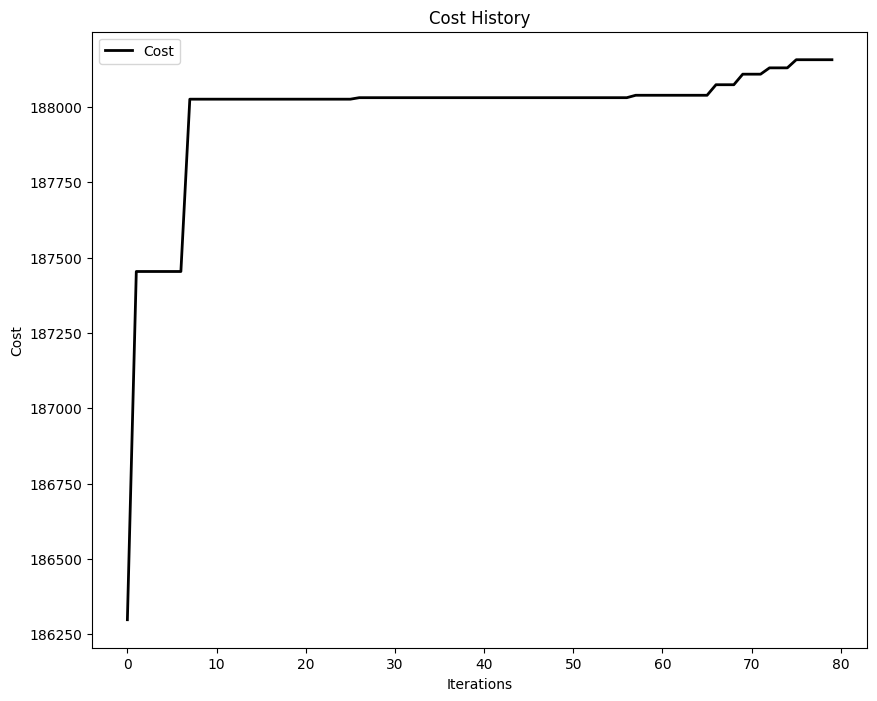

In [ ]:
resultPSO.SaveResult(result)

# To add more iterations from the last one

In [9]:
import math
decisionVariableArray = constraint_file['variable_splits']
n_particles = int(10+2*math.sqrt(len(decisionVariableArray)))
n_particles

18

In [10]:
pso_date = '05.30.2024'
fileName = base_path + f'Pos Result {pso_date}.csv'
pos_df = pd.read_csv(fileName).drop(columns='Unnamed: 0')
inputWeights = np.tile(pos_df.pos.to_numpy(), [n_particles, 1])

In [12]:
itNum = 50
options = {'c1': 0.20255337412386598,
 'c2': 0.034812002156869526,
 'w': 0.8707709059066462}
result = resultPSO.run_pso(options, n_particles=n_particles, itNum=itNum, init_pos=inputWeights)

2024-05-31 14:52:51,258 - pyswarms.single.global_best - INFO - Optimize for 50 iters with {'c1': 0.20255337412386598, 'c2': 0.034812002156869526, 'w': 0.8707709059066462}


/home/jupyter/SearchForecasting/UK/June 2024 Update 2/Input Weight History 05.31.2024.csv


pyswarms.single.global_best:   0%|          |0/50

--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -186663.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -186663.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -186663.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -186663.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---

pyswarms.single.global_best:   2%|▏         |1/50, best_cost=-1.87e+5

yhat: -186663.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184312.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183633.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184402.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184912.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:   4%|▍         |2/50, best_cost=-1.87e+5

yhat: -184085.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  -0.0
yhat: -184663.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185327.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183354.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184262.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:   6%|▌         |3/50, best_cost=-1.87e+5

yhat: -183541.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183809.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184152.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183908.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183473.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:   8%|▊         |4/50, best_cost=-1.87e+5

yhat: -184862.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184248.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -182223.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185058.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185678.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  10%|█         |5/50, best_cost=-1.87e+5

yhat: -185759.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  -0.0
yhat: -183232.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183733.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183725.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  -0.0
yhat: -184375.0
client_budget - analytical_spend_latest_period: 0


pyswarms.single.global_best:  12%|█▏        |6/50, best_cost=-1.87e+5

yhat: -182977.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184340.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185149.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184955.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185400.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  14%|█▍        |7/50, best_cost=-1.87e+5

yhat: -184836.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184434.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  -0.0
yhat: -185611.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183426.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184169.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  16%|█▌        |8/50, best_cost=-1.87e+5

yhat: -183971.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183654.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  -0.0
yhat: -186157.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -182491.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184493.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  18%|█▊        |9/50, best_cost=-1.87e+5

yhat: -182617.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184783.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183990.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  -0.0
yhat: -185348.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183900.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  20%|██        |10/50, best_cost=-1.87e+5

yhat: -184911.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183325.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183932.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184343.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183489.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  22%|██▏       |11/50, best_cost=-1.87e+5

yhat: -183993.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185205.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184433.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185219.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184394.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  24%|██▍       |12/50, best_cost=-1.87e+5

yhat: -184669.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  -0.0
yhat: -183695.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184568.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185098.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184521.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  26%|██▌       |13/50, best_cost=-1.87e+5

yhat: -184416.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184394.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184579.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185605.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  -0.0
yhat: -183824.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  28%|██▊       |14/50, best_cost=-1.87e+5

yhat: -184922.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184633.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  -0.0
yhat: -184547.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184280.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  -0.0
yhat: -183804.0
client_budget - analytical_spend_latest_period: 0


pyswarms.single.global_best:  30%|███       |15/50, best_cost=-1.87e+5

yhat: -183957.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  -0.0
yhat: -184593.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184995.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185021.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183522.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  32%|███▏      |16/50, best_cost=-1.87e+5

yhat: -185410.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183467.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184759.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184691.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185288.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  34%|███▍      |17/50, best_cost=-1.87e+5

yhat: -185163.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184626.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184010.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185575.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184960.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  36%|███▌      |18/50, best_cost=-1.87e+5

yhat: -184463.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185033.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  -0.0
yhat: -184644.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183645.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183939.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  38%|███▊      |19/50, best_cost=-1.87e+5

yhat: -183543.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184480.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -186110.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184565.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183946.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  40%|████      |20/50, best_cost=-1.87e+5

yhat: -185081.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183898.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184591.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183954.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185593.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  42%|████▏     |21/50, best_cost=-1.87e+5

yhat: -184891.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  -0.0
yhat: -184326.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  -0.0
yhat: -185685.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184047.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184236.0
client_budget - analytical_spend_latest_period: 0


pyswarms.single.global_best:  44%|████▍     |22/50, best_cost=-1.87e+5

yhat: -183426.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  -0.0
yhat: -184720.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  -0.0
yhat: -184150.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  -0.0
yhat: -183594.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184189.0
client_budget - analytical_spend_latest_period: 0

pyswarms.single.global_best:  46%|████▌     |23/50, best_cost=-1.87e+5

yhat: -184345.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183502.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185861.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183336.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185067.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  48%|████▊     |24/50, best_cost=-1.87e+5

yhat: -184788.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184511.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  -0.0
yhat: -183906.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185351.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184092.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  50%|█████     |25/50, best_cost=-1.87e+5

yhat: -184322.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -186155.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184957.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184444.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  -0.0
yhat: -183487.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  52%|█████▏    |26/50, best_cost=-1.87e+5

yhat: -184473.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183813.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183858.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183363.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184721.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  54%|█████▍    |27/50, best_cost=-1.87e+5

yhat: -185079.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185756.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185238.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184740.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183095.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  56%|█████▌    |28/50, best_cost=-1.87e+5

yhat: -183630.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183988.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185689.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183051.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184671.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  58%|█████▊    |29/50, best_cost=-1.87e+5

yhat: -185415.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185123.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185369.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185508.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183218.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  60%|██████    |30/50, best_cost=-1.87e+5

yhat: -183907.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185577.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184563.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183582.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183680.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  62%|██████▏   |31/50, best_cost=-1.87e+5

yhat: -184042.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184025.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  -0.0
yhat: -184947.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183760.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184562.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  64%|██████▍   |32/50, best_cost=-1.87e+5

yhat: -183956.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184015.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184487.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  -0.0
yhat: -183939.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184431.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  66%|██████▌   |33/50, best_cost=-1.87e+5

yhat: -185603.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -186114.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184588.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184203.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183788.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  68%|██████▊   |34/50, best_cost=-1.87e+5

yhat: -182702.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -182714.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  -0.0
yhat: -185444.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184860.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183770.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  70%|███████   |35/50, best_cost=-1.87e+5

yhat: -184084.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185240.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184375.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184741.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183947.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  72%|███████▏  |36/50, best_cost=-1.87e+5

yhat: -185897.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185244.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185582.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184002.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185339.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  74%|███████▍  |37/50, best_cost=-1.87e+5

yhat: -183333.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183779.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185185.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184151.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183507.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  76%|███████▌  |38/50, best_cost=-1.87e+5

yhat: -184400.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184541.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185230.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183754.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184895.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  78%|███████▊  |39/50, best_cost=-1.87e+5

yhat: -184785.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185592.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185383.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  -0.0
yhat: -184553.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185143.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  80%|████████  |40/50, best_cost=-1.87e+5

yhat: -184839.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183024.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184316.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185180.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183640.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  82%|████████▏ |41/50, best_cost=-1.87e+5

yhat: -184944.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184980.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184173.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183635.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183595.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  84%|████████▍ |42/50, best_cost=-1.87e+5

yhat: -185005.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185330.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185636.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184924.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185637.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  86%|████████▌ |43/50, best_cost=-1.87e+5

yhat: -184686.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184920.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183825.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183714.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  -0.0
yhat: -183011.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  88%|████████▊ |44/50, best_cost=-1.87e+5

yhat: -184807.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184549.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184617.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185635.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184896.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  90%|█████████ |45/50, best_cost=-1.87e+5

yhat: -183482.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  -0.0
yhat: -184604.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185932.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -182248.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184738.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  92%|█████████▏|46/50, best_cost=-1.87e+5

yhat: -184777.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184035.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184216.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184731.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183519.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best:  94%|█████████▍|47/50, best_cost=-1.87e+5

yhat: -184813.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185436.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185195.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183013.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  -0.0
yhat: -184942.0
client_budget - analytical_spend_latest_period: 0
-

pyswarms.single.global_best:  96%|█████████▌|48/50, best_cost=-1.87e+5

yhat: -184027.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183446.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  -0.0
yhat: -183891.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  -0.0
yhat: -184696.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183988.0
client_budget - analytical_spend_latest_period: 0


pyswarms.single.global_best:  98%|█████████▊|49/50, best_cost=-1.87e+5

yhat: -183406.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184574.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -185467.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -183914.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  1372264.0 difference between planned and forecast X:  0.0
yhat: -184356.0
client_budget - analytical_spend_latest_period: 0
--

pyswarms.single.global_best: 100%|██████████|50/50, best_cost=-1.87e+5
2024-05-31 15:20:12,725 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -186663.0, best pos: [1.10604244 1.17435498 0.99132888 1.06265397 0.93100305 0.99880784
 1.00472441 1.14173807 1.16533059 0.90156166 0.8065192  0.93130104
 0.99716909 0.8939355  1.01285721 0.90661193 0.84931951 0.91367645]


yhat: -185640.0
client_budget - analytical_spend_latest_period: 0
Compute duration: 1641.4685838222504


/home/jupyter/SearchForecasting/UK/June 2024 Update 2/Pos Result 05.31.2024.csv
File exists. Please delete it first.
/home/jupyter/SearchForecasting/UK/June 2024 Update 2/Iteration History 05.31.2024.csv
File exists. Please delete it first.


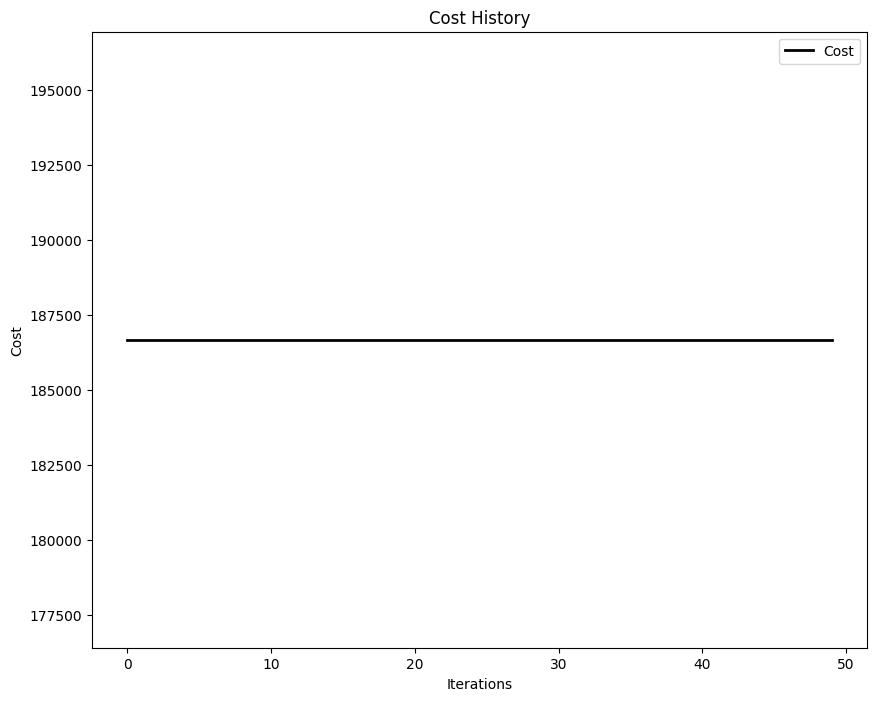

In [14]:
resultPSO.SaveResult(result)